In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df_pca0 = pd.read_csv("results/scores_pca__pca0.csv")
df_pca1 = pd.read_csv("results/scores_pca__pca1.csv")
df_pca2 = pd.read_csv("results/scores_pca__pca2.csv")

data_r_corr = {
    'pca0' : df_pca0["pearsonr"],
    'pca1' : df_pca1["pearsonr"],
    'pca2' : df_pca2["pearsonr"],
}

data_r2_corr = {
    'pca0' : df_pca0["r2_corr"],
    'pca1' : df_pca1["r2_corr"],
    'pca2' : df_pca2["r2_corr"],
}

df_r_corr = pd.DataFrame(data_r_corr)
df_r2_corr = pd.DataFrame(data_r2_corr)


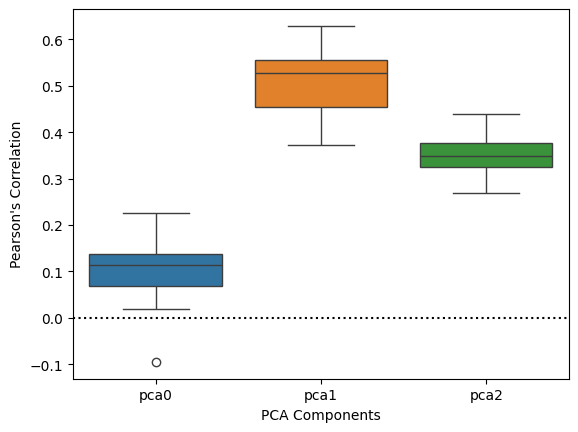

In [31]:
sns.boxplot(data=df_r_corr)
plt.axhline(0, color="k", ls=":")
plt.xlabel('PCA Components')
plt.ylabel("Pearson's Correlation")
plt.show()

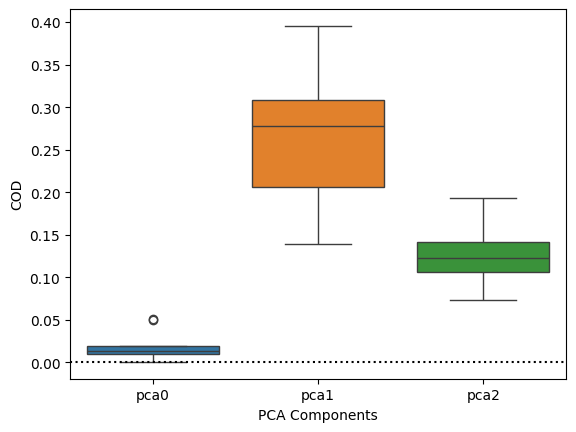

In [32]:
sns.boxplot(data=df_r2_corr)
plt.axhline(0, color="k", ls=":")
plt.xlabel('PCA Components')
plt.ylabel("COD")
plt.show()